# Analyse exploratoire des données de Stack Overflow

SELECT TOP(50000) Id, CreationDate, Score, ViewCount, AnswerCount, CommentCount, FavoriteCount, Title, Body, Tags

FROM Posts

WHERE CreationDate BETWEEN CONVERT(datetime, '2020-01-01') 
AND CONVERT(datetime, '2020-02-01')

AND Score IS NOT NULL

AND ViewCount IS NOT NULL

AND AnswerCount IS NOT NULL

AND CommentCount IS NOT NULL

AND FavoriteCount IS NOT NULL

ORDER BY CreationDate

In [33]:
import os
import warnings
warnings.filterwarnings('ignore')
import IPython.display
import numpy as np
import pandas as pd 


print('### Data files ###')
for idx, file in enumerate(os.listdir('data')):
    print(idx, '-', file)
print('\n' + '-' *50 +'\n')

data = pd.DataFrame()

for idx, file in enumerate(os.listdir('data')):
    path = 'data/' + file
    df = pd.read_csv(path,
                     index_col = 0,
                     parse_dates=['CreationDate'],
                     na_values = 'NaN'
                    )
        
    data = pd.concat([data, df],
                      axis=0)
    
na_body_idx = data[data['Body'].isna()==True].index
data.drop(index = na_body_idx, inplace=True)
data.sort_values('CreationDate', inplace=True)
print("Dix premières valeurs du dataset")
display(data.head(10))
print('\n' + '-' *50 +'\n')
print(f"Nombre d'observations: {data.shape[0]}, nombre de variables: {data.shape[1]}")

### Data files ###
0 - QueryResults(20.01).csv
1 - QueryResults(20.02).csv
2 - QueryResults(20.03).csv
3 - QueryResults(20.04).csv
4 - QueryResults(20.05).csv
5 - QueryResults(20.06).csv
6 - QueryResults(20.07).csv
7 - QueryResults(20.08).csv
8 - QueryResults(20.09).csv
9 - QueryResults(20.10).csv
10 - QueryResults(20.11).csv
11 - QueryResults(20.12).csv
12 - QueryResults(21.01).csv
13 - QueryResults(21.02).csv
14 - QueryResults(21.03).csv
15 - QueryResults(21.04).csv
16 - QueryResults(21.05).csv
17 - QueryResults(21.06).csv
18 - QueryResults(21.07).csv
19 - QueryResults(21.08).csv
20 - QueryResults(21.09).csv
21 - QueryResults(21.10).csv
22 - QueryResults(21.11).csv
23 - QueryResults(21.12).csv
24 - QueryResults(22.01).csv
25 - QueryResults(22.02).csv
26 - QueryResults(22.03).csv
27 - QueryResults(22.04).csv
28 - QueryResults(22.05).csv
29 - QueryResults(22.06).csv

--------------------------------------------------

Dix premières valeurs du dataset


,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
59549222,2020-01-01 00:01:28,0,38,1,0,1,How to adjust Android gridlayout spacing from ...,<p>I have the following code :</p>\n\n<pre><co...,<android><spacing><android-gridlayout>
59549242,2020-01-01 00:09:38,12,16310,3,6,1,Integrating Paypal payments in Flutter app,<p>I just started on my Flutter journey and ne...,<flutter><paypal><payment-gateway>
59549258,2020-01-01 00:14:31,-1,52,1,2,1,My Discord XP bot isn't recognizing user data ...,<p>My bot is not working as planned.<br>\nFor ...,<python><discord><discord.py>
59549281,2020-01-01 00:23:15,3,822,1,0,1,How to use a trait object that contains a meth...,<p>What's the correct way to use a trait objec...,<rust>
59549286,2020-01-01 00:24:49,2,77,1,0,1,A way for users to store selections as inputs ...,<p>I'm trying to create a way in which a user ...,<r><shiny><shiny-server><shiny-reactivity><shi...
59549309,2020-01-01 00:32:55,8,17659,2,1,2,Unable to find a virtual host listening on por...,<p>My web server is set up like this:</p>\n<ul...,<amazon-ec2><virtualhost><certbot>
59549310,2020-01-01 00:33:01,-2,2070,2,4,1,raspberry pi 4 tensorflow installation,<pre><code>pi@raspberrypi:~/examples/lite/exam...,<python><tensorflow><raspberry-pi><hdfs>
59549359,2020-01-01 00:47:38,0,642,3,4,1,Load a view by clicking in a button CodeIgniter,<p>I'm trying to load a view by clicking <cod...,<php><html><codeigniter>
59549421,2020-01-01 01:09:13,0,967,2,4,1,Autocorrect python library throwing error inst...,<p>I'm not really sure why this autocorrect is...,<python><python-3.x><autocorrect>



--------------------------------------------------

Nombre d'observations: 427018, nombre de variables: 9


## Test des valeurs manaquantes

Avant tout traitement nous souhaitons savoir si certaines observations variables sont manquantes.

In [34]:
def test_completion(data):
    """
    Compute sorted completion rate and number of missing values for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index(string): Variable names
            Taux de completion(float): completion rate
            Nombre de valeurs manquantes(int): Number of missing values
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)

test_completion(data)

,Taux de complétion,Nombre de valeurs manquantes
CreationDate,100.0,0
Score,100.0,0
ViewCount,100.0,0
AnswerCount,100.0,0
CommentCount,100.0,0
FavoriteCount,100.0,0
Title,100.0,0
Body,100.0,0
Tags,100.0,0


Nous ne constatons aucune valeur manquante

## Analyse statistique des variables numériques

### CreationDate

Using matplotlib backend: TkAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


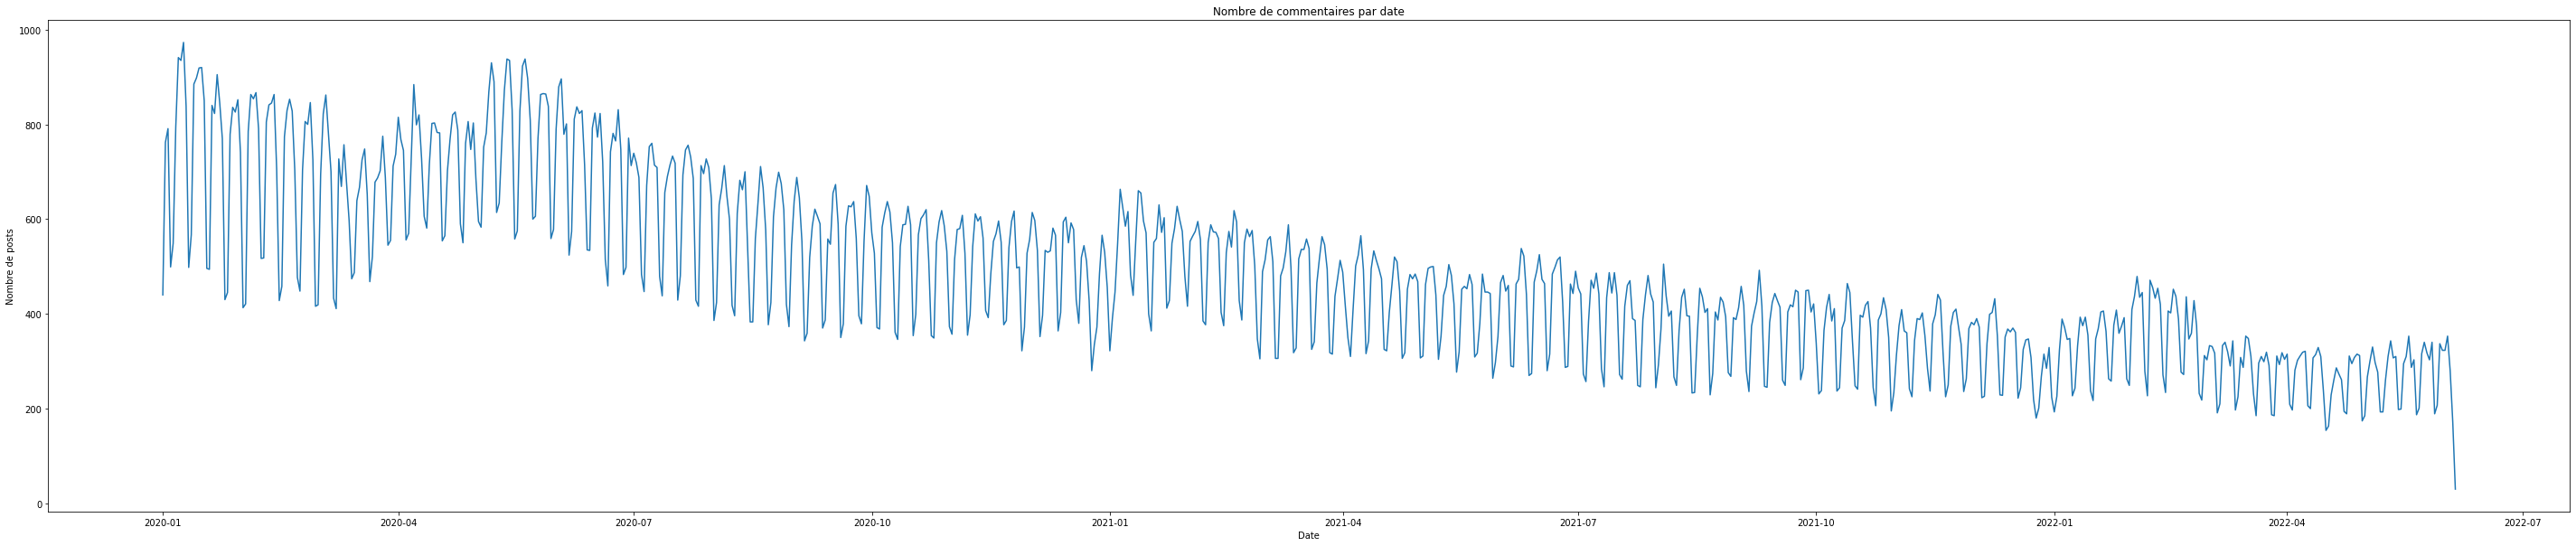

In [35]:
%pylab 
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50,10))
CreationDateByDay = data['CreationDate'].dt.date.value_counts()

sns.lineplot(data=CreationDateByDay, x=CreationDateByDay.index, y=CreationDateByDay.values, ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Nombre de posts")
ax.set_title("Nombre de commentaires par date")

plt.show()

Nous constatons une baisse d’activité sur la période. 

Nous pouvons en déduire une proportion de posts décroissante dans le temps. Donc, filtrer les posts par date de création pénaliserait les publications les plus récentes et les thématiques qui y sont associées.

In [36]:
df=data.copy()

In [37]:
df

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
59549222,2020-01-01 00:01:28,0,38,1,0,1,How to adjust Android gridlayout spacing from ...,<p>I have the following code :</p>\n\n<pre><co...,<android><spacing><android-gridlayout>
59549242,2020-01-01 00:09:38,12,16310,3,6,1,Integrating Paypal payments in Flutter app,<p>I just started on my Flutter journey and ne...,<flutter><paypal><payment-gateway>
59549258,2020-01-01 00:14:31,-1,52,1,2,1,My Discord XP bot isn't recognizing user data ...,<p>My bot is not working as planned.<br>\nFor ...,<python><discord><discord.py>
59549281,2020-01-01 00:23:15,3,822,1,0,1,How to use a trait object that contains a meth...,<p>What's the correct way to use a trait objec...,<rust>
59549286,2020-01-01 00:24:49,2,77,1,0,1,A way for users to store selections as inputs ...,<p>I'm trying to create a way in which a user ...,<r><shiny><shiny-server><shiny-reactivity><shi...
...,...,...,...,...,...,...,...,...,...
72505092,2022-06-05 05:51:03,0,8,0,1,1,Two player game simulation in R using probabil...,<p>I'm very new to R and am coding a two playe...,<r><vector><simulation><probability><utility>
72505166,2022-06-05 06:08:21,0,8,0,0,1,How to print a binary search tree in level ord...,"<p>So right now, when I have a tree that looks...",<c><binary-tree><binary-search-tree>
72505188,2022-06-05 06:12:01,0,13,0,1,0,Page refresh automatically only on iphone devi...,<p>My app is built on laravel + vue js.</p>\n<...,<laravel><vue.js>


# Время добавления

Так как в нашем распоряжении есть чудесная переменная `added`, то можно поиграться с ней, преобразовав в понятный питону формат и повытаскивая из него час, день недели и месяца, месяц и год добавления

In [38]:
df['Timestamp'] = pd.to_datetime(df['CreationDate'])

In [39]:
df['Year'] = df.Timestamp.apply(lambda x: x.year)
df['Month'] = df.Timestamp.apply(lambda x: x.month)
df['Day'] = df.Timestamp.apply(lambda x: x.day)
df['Hour'] = df.Timestamp.apply(lambda x: x.hour)
df['Weekday'] = df.Timestamp.apply(lambda x: x.weekday())

In [40]:
df['days_from_creation'] = (df.Timestamp.max() - df.Timestamp)/np.timedelta64(1, 'D')

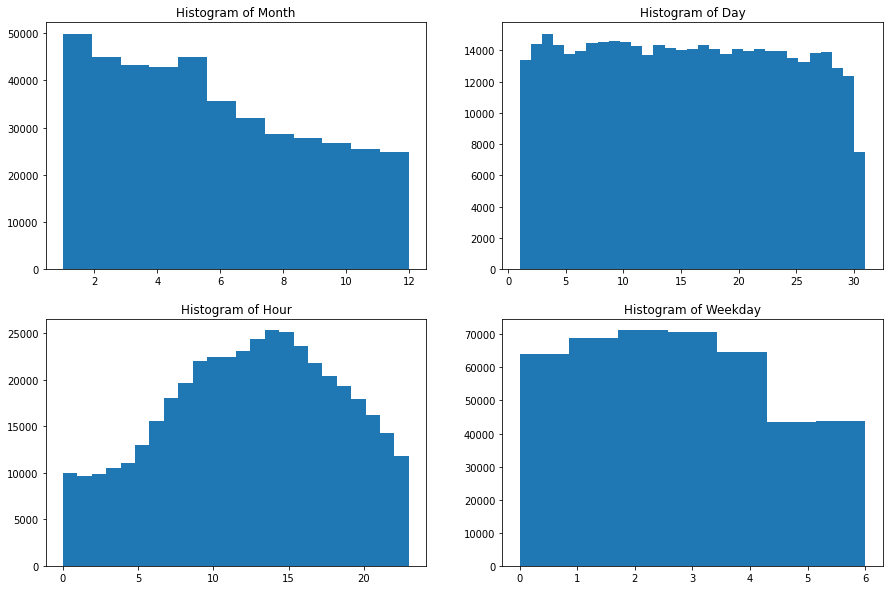

In [41]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(15,10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(df[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

Итак, что тут есть интересного:
- День ничего необычного не принес, распределено достаточно равномерно
- Гистограмма часа достаточно показательная - в ночной период активность значительно снижается, а затем растет, достигая пика примерно после окончания уроков у основной аудитории
- По дням недели есть заметное снижения на выходных, интересно, почему бы это

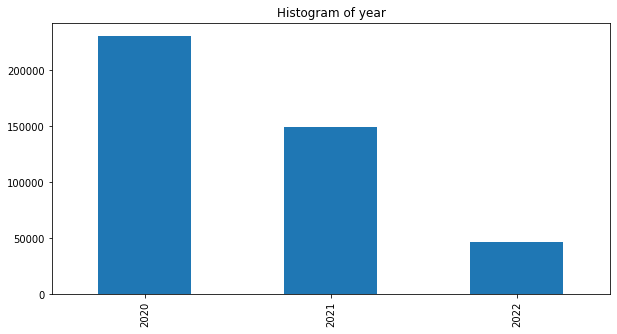

In [42]:
df.Year.value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Histogram of year")
plt.show()

In [43]:
df.Year.value_counts(normalize=True).apply(lambda x: "{:.2f}%".format(x*100))

2020    54.01%
2021    34.96%
2022    11.03%
Name: Year, dtype: object

In [44]:
df.CreationDate.value_counts()[:10]

2021-08-27 16:07:43    3
2020-07-30 08:31:15    3
2020-06-18 18:34:47    3
2021-02-26 10:20:55    2
2021-08-16 13:16:59    2
2021-01-05 16:56:26    2
2021-07-29 18:22:22    2
2020-01-13 12:08:48    2
2020-07-09 17:22:06    2
2020-05-27 10:03:39    2
Name: CreationDate, dtype: int64

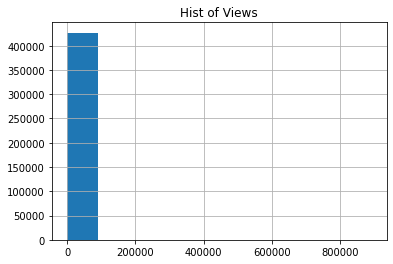

In [45]:
df.ViewCount[df.ViewCount>0].hist(bins=10)
plt.title("Hist of Views")
plt.show()

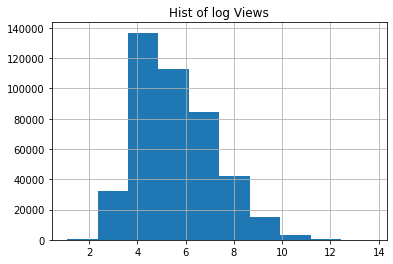

In [46]:
df.ViewCount[df.ViewCount>0].apply(np.log).hist(bins=10)
plt.title("Hist of log Views")
plt.show()

In [47]:
df['average_views'] = df.ViewCount/df.days_from_creation

In [48]:
df[df['average_views']==df['average_views'].max()]

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,Timestamp,Year,Month,Day,Hour,Weekday,days_from_creation,average_views
Id,,,,,,,,,,,,,,,,,
72505230,2022-06-05 06:23:57,0,20,0,2,1,What is the difference for those two operation...,<pre><code>public class OperationExample {\n ...,<java><literals>,2022-06-05 06:23:57,2022,6,5,6,6,0.0,inf


In [49]:
index = df['average_views']==df['average_views'].max()
df['average_views'][index] =df['ViewCount'][index]

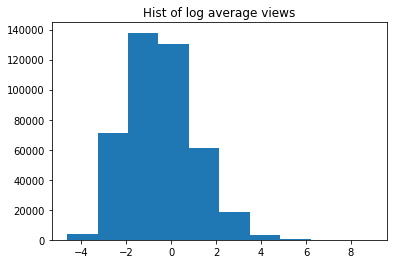

In [50]:
plt.hist(df.average_views.apply(np.log))
plt.title("Hist of log average views");

### Посмотрим на самые популярные!

In [51]:
popular = df.sort_values(by='average_views', ascending=False)
for i in popular.index.tolist()[:7]:
    print('Title: ')
    print(popular.loc[i,'Title'])
    print("Average views (per day) {}".format(round(popular.loc[i,'average_views'])))
    print('==============\n')

Title: 
How to solve this drag and drop using pure HTML, CSS and JavaScript
Average views (per day) 7467

Title: 
Why does this code execute more slowly after strength-reducing multiplications to loop-carried additions?
Average views (per day) 4875

Title: 
Support for password authentication was removed. Please use a personal access token instead
Average views (per day) 3017

Title: 
Error message "error:0308010C:digital envelope routines::unsupported"
Average views (per day) 1871

Title: 
Heroku and GitHub: "Items could not be retrieved, Internal server error"
Average views (per day) 1781

Title: 
Page refresh automatically only on iphone devices (on both safari and chrome) and gives error can't load page
Average views (per day) 1569

Title: 
TypeError: Cannot read properties of undefined (reading 'id')
Average views (per day) 1319



# Комментарии

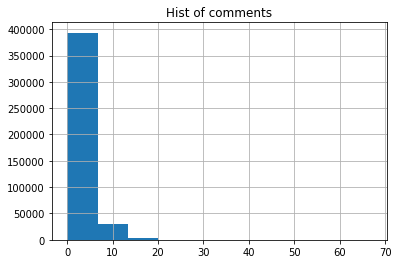

In [52]:
df.CommentCount.hist()
plt.title("Hist of comments")
plt.show()

### Посмотрим на самые комментируемые

In [53]:
df['average_comments'] = df.CommentCount/df.days_from_creation
index = df['average_comments']==df['average_comments'].max()
df['average_comments'][index] = df['CommentCount'][index]
popular = df.sort_values(by='average_comments', ascending=False)
for i in popular.index.tolist()[:7]:
    print('Meme name: ')
    print(popular.loc[i,'Title'])
    print("Average comments (per day) {}".format(round(popular.loc[i,'average_comments'])))
    print('==============\n')

Meme name: 
Page refresh automatically only on iphone devices (on both safari and chrome) and gives error can't load page
Average comments (per day) 121

Meme name: 
I cant pick a choice after looping
Average comments (per day) 110

Meme name: 
This code gives me the error free() invalid size
Average comments (per day) 46

Meme name: 
Two player game simulation in R using probabilities
Average comments (per day) 44

Meme name: 
java.lang.NoSuchMethodError: 'org.apache.flink.metrics.MetricGroup org.apache.flink.api.common.functions.RuntimeContext.getMetricGroup()'
Average comments (per day) 33

Meme name: 
How to split a version number and assign each number to a variable?
Average comments (per day) 30

Meme name: 
static method giving wrong localdate in multithreaded environment
Average comments (per day) 28



### Score

Using matplotlib backend: TkAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


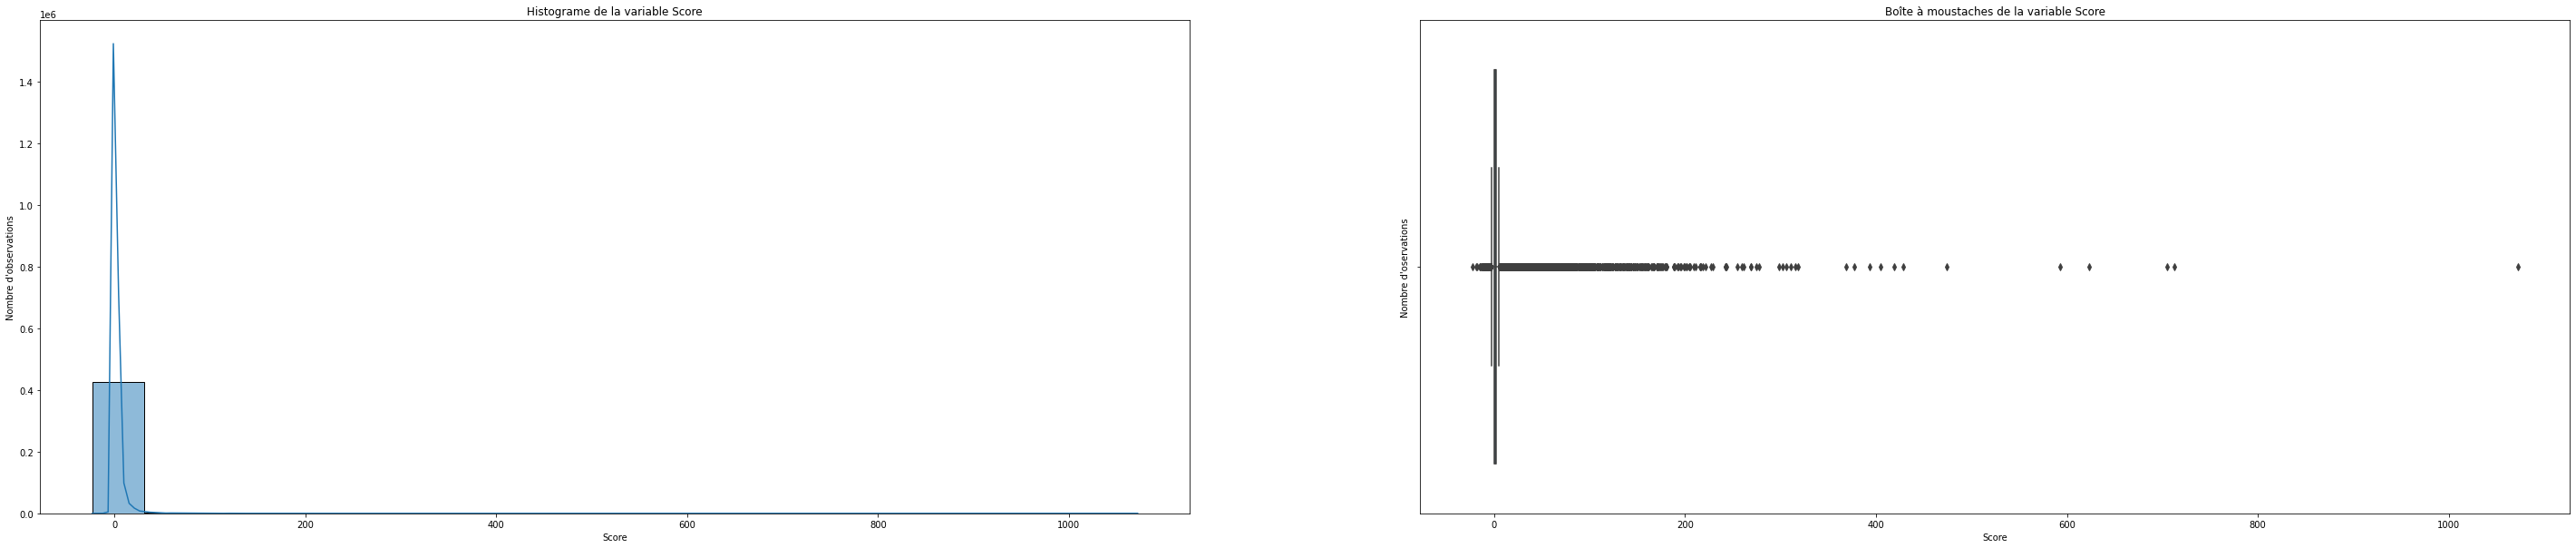


--------------------------------------------------

Indicateurs statistiques de distribution de la variable Score:


count    427018.000000
mean          1.885433
std           6.411151
min         -23.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        1072.000000
Name: Score, dtype: float64

In [54]:
%pylab 
%matplotlib inline
import seaborn as sns


def plot_continuous_distribution(data, col, bins='sturges'):
    """
    Plot distribution plot, box plot and statistical distribution figures
    
    Args: 
        data(DataFrame): Name of the dataframe 
        
        col(String): Name of the column to plot
        
    Returns:
        Variable distribution plots and figures
    """
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(50,10))
    
    sns.histplot(data=data, x=col, bins='sturges', kde=True, ax=ax[0])
    ax[0].set_xlabel(f"{col}")
    ax[0].set_ylabel("Nombre d'observations")
    ax[0].set_title(f"Histograme de la variable {col}")
    
    sns.boxplot(data=data, x=col)
    ax[1].set_xlabel(f"{col}")
    ax[1].set_ylabel("Nombre d'oservations")
    ax[1].set_title(f"Boîte à moustaches de la variable {col}")
    plt.show()
    
    print("\n" + "-" * 50 + "\n")
    print(f"Indicateurs statistiques de distribution de la variable {col}:")
    display(data[col].describe())
    
    
plot_continuous_distribution(data=data, col='Score')

Nous constatons une distribution centrée autour de la valeur 1 avec une majrité d'observation situées dans l'interquartile entre 0 et 3. 

### ViewCount

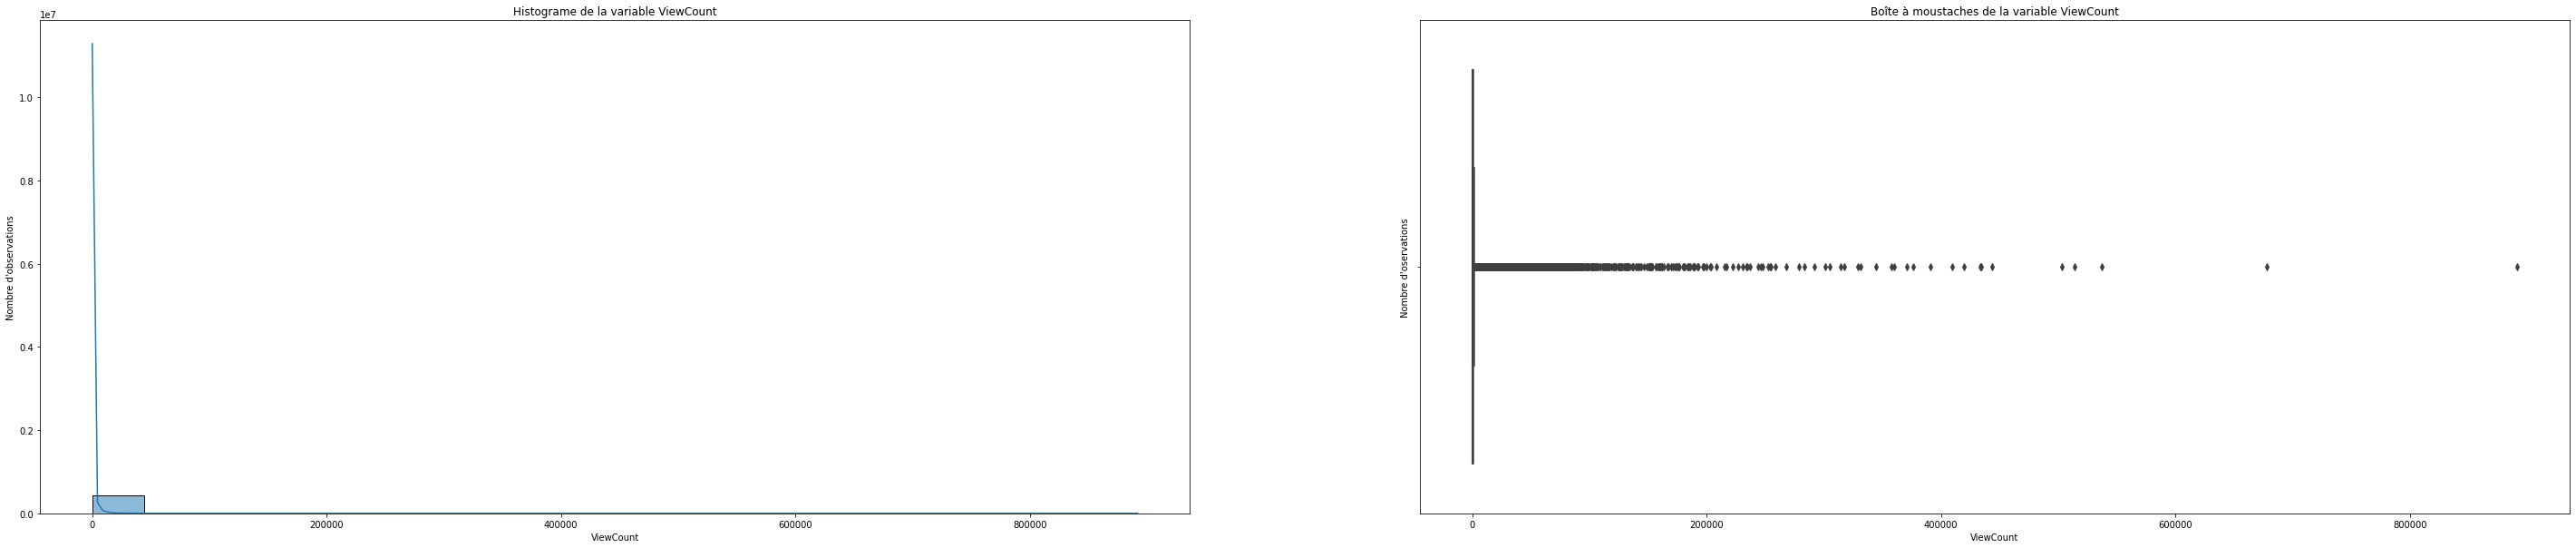


--------------------------------------------------

Indicateurs statistiques de distribution de la variable ViewCount:


count    427018.000000
mean       1253.962632
std        5925.223883
min           3.000000
25%          73.000000
50%         208.000000
75%         751.000000
max      891829.000000
Name: ViewCount, dtype: float64

In [55]:
plot_continuous_distribution(data=data, col='ViewCount')

Nous constatons une distribution centrée autour de 98 avec un équart interquartile entre 79 et 1211.

### AnswerCount

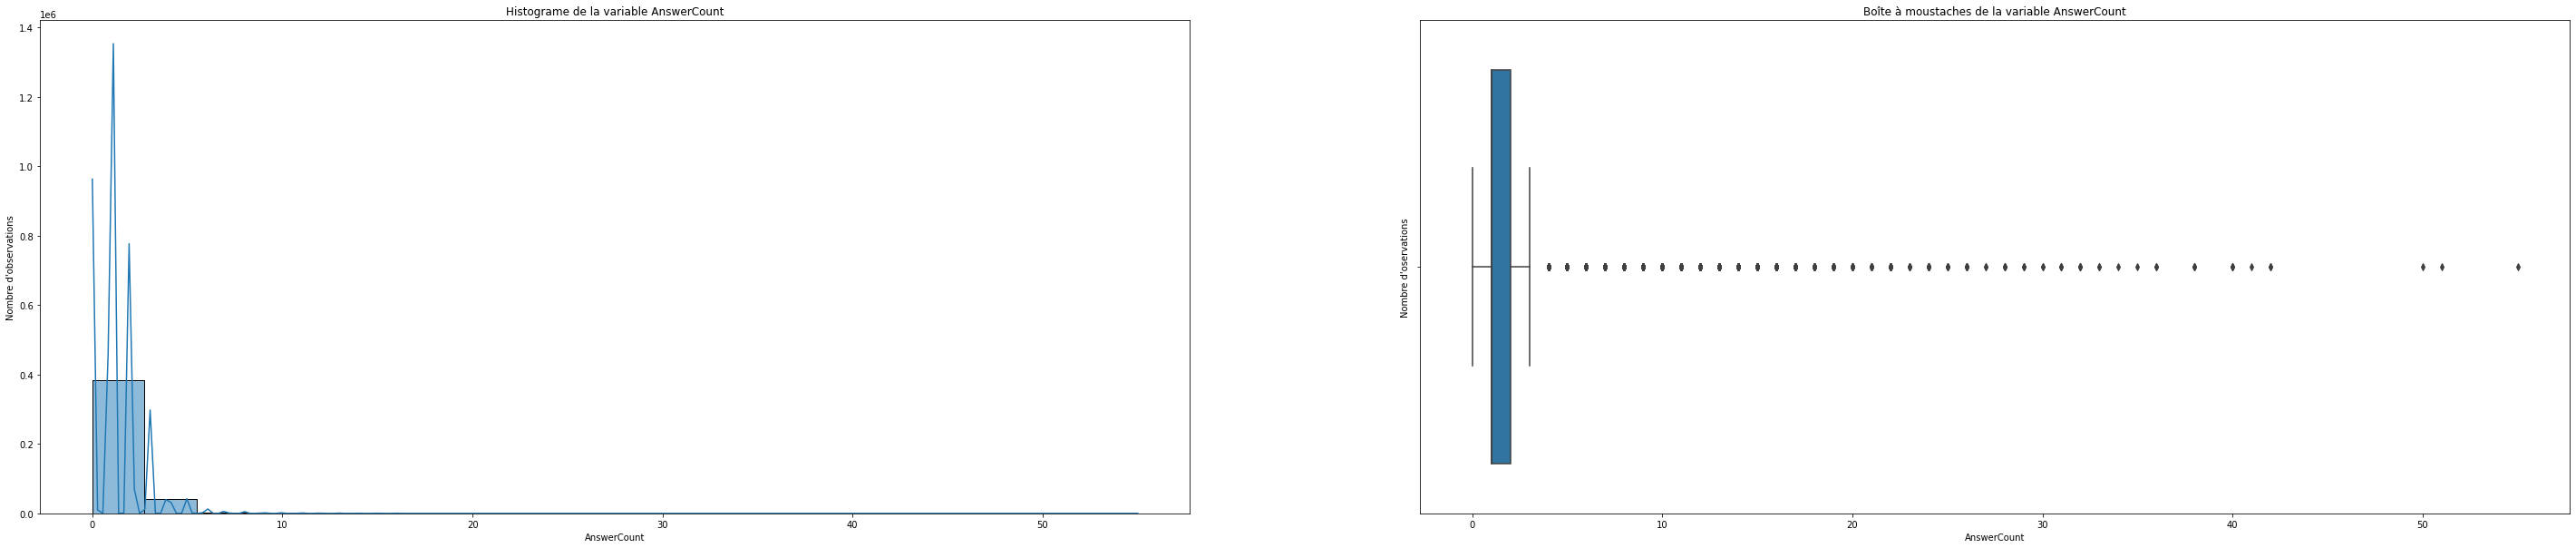


--------------------------------------------------

Indicateurs statistiques de distribution de la variable AnswerCount:


count    427018.000000
mean          1.297475
std           1.219754
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          55.000000
Name: AnswerCount, dtype: float64

In [56]:
plot_continuous_distribution(data=data, col='AnswerCount')

La distribution de la variable est centrée autour de 1 avec un équart interquartile entre 1 et 2

### CommentCount

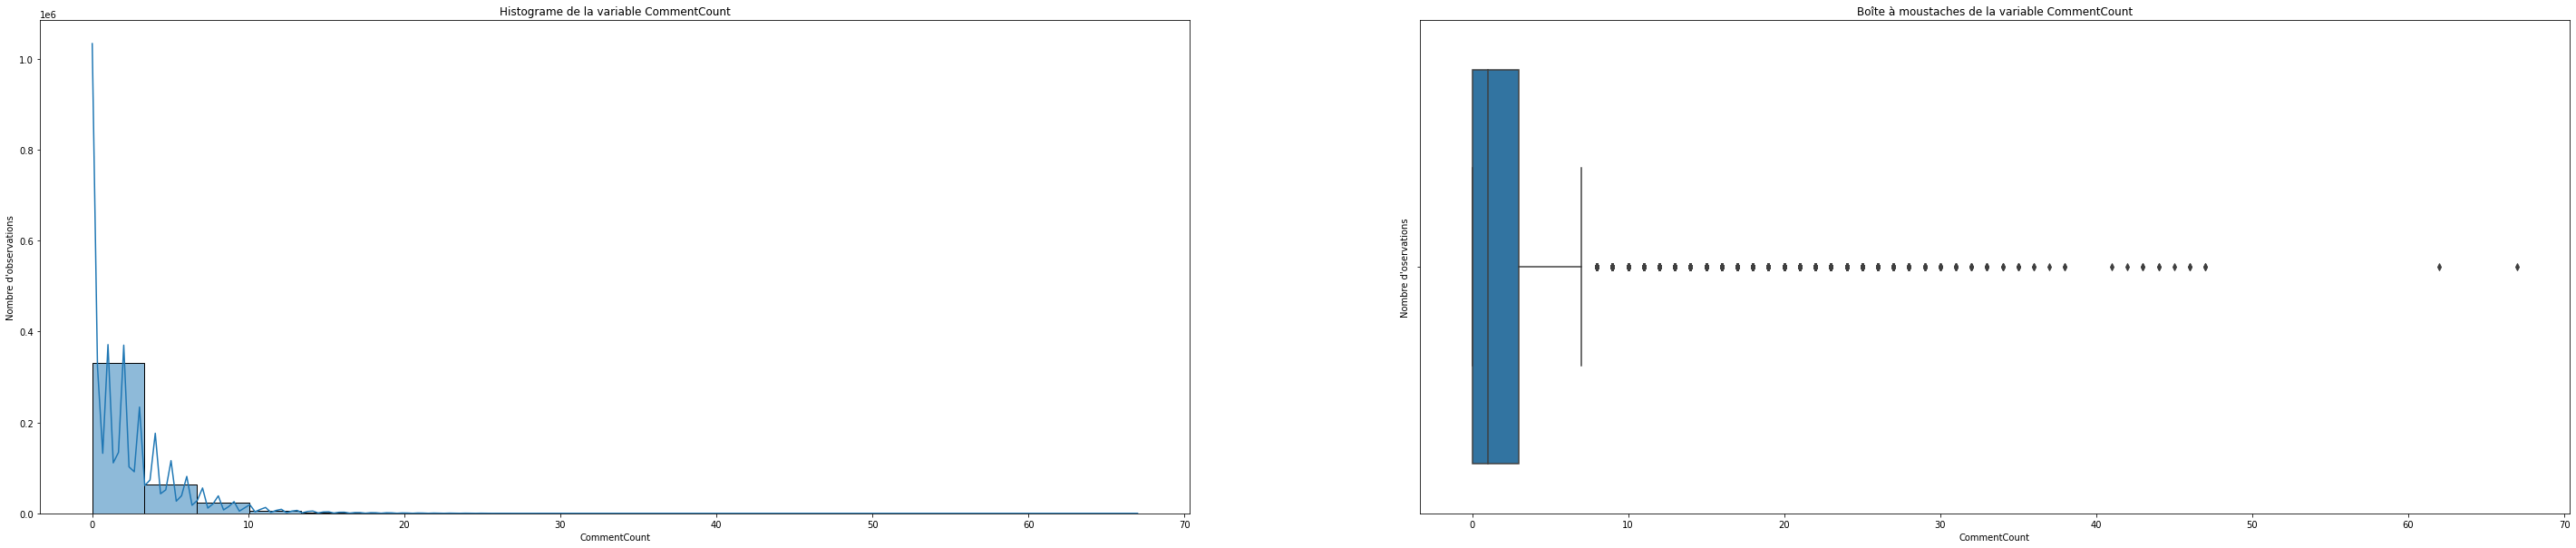


--------------------------------------------------

Indicateurs statistiques de distribution de la variable CommentCount:


count    427018.000000
mean          2.166260
std           2.933803
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          67.000000
Name: CommentCount, dtype: float64

In [57]:
plot_continuous_distribution(data=data, col='CommentCount')

La variable est centrée autour de 1 avec un interquartile entre 0 et 3

### FavoriteCount

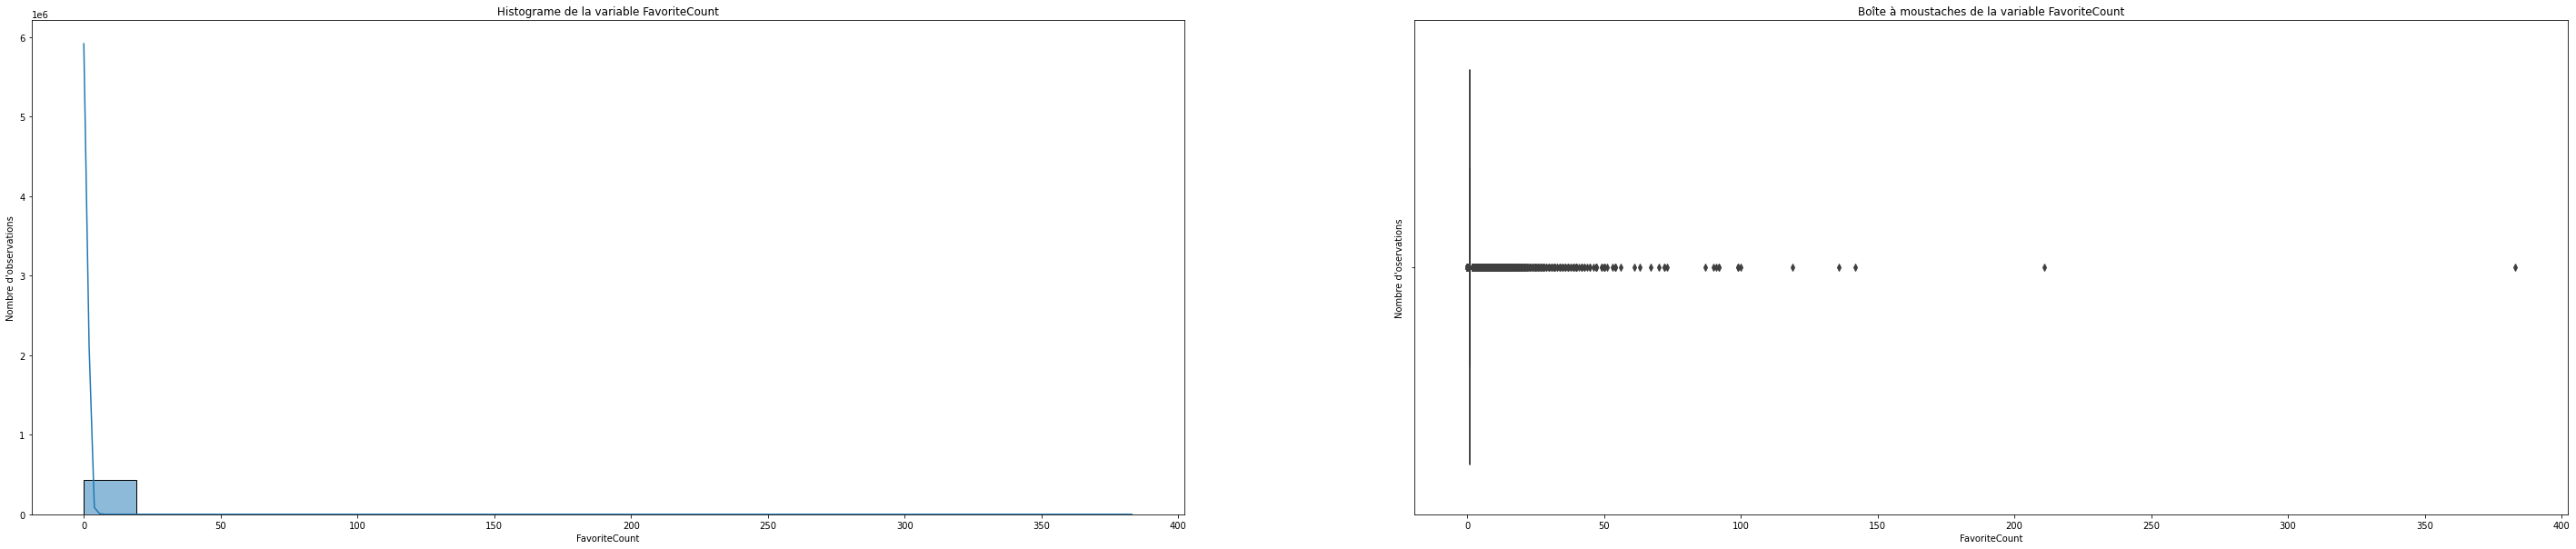


--------------------------------------------------

Indicateurs statistiques de distribution de la variable FavoriteCount:


count    427018.000000
mean          1.035544
std           1.463530
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         383.000000
Name: FavoriteCount, dtype: float64

In [58]:
plot_continuous_distribution(data=data, col='FavoriteCount')

Nous observons que la majorité des observations est située autour de 1. Observons à présent le nombre d'observations ayant une valeur supérieure.

In [59]:
fav_count_filter = data[data["FavoriteCount"]>1].copy()
print(f"Nombre d'observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: {fav_count_filter.shape[0]}")
print(f"Proportion des observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: {round(fav_count_filter.shape[0]/data.shape[0]*100,2)}%")

Nombre d'observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: 54868
Proportion des observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: 12.85%


### ViewCountByDay

Nous estimons que le ViewCount peu représenter un biais dans la mesure que des posts plus anciens ont potentiellement une propention à avoir un ValueCount plus élevé. Afin de vérifier l'hypothèse nous procédons de la sorte:
- Construction d'une variable CreationDateTimeDelta : différence entre la valeur maximum de CreationDate et valeur CreationDate de chaque observation
- Visualisation la distribution des points entre les variables ViewCount et CreationDateTimeDelta

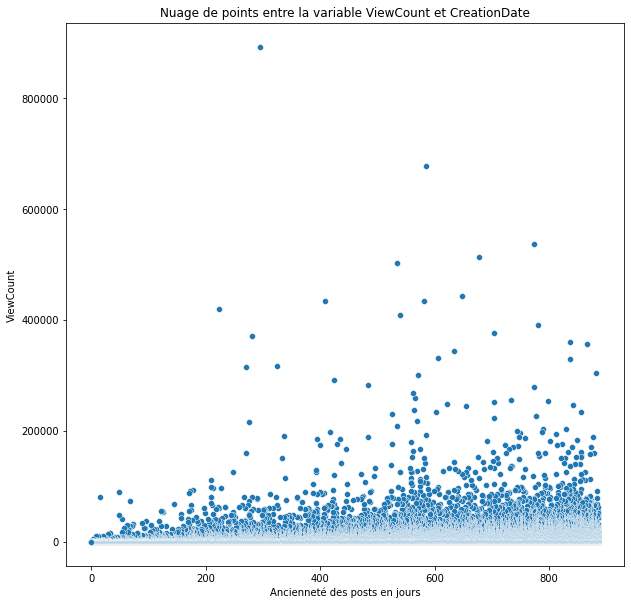

In [60]:
last_post = data["CreationDate"].max()
data["CreationDateTimeDelta"] = last_post - data["CreationDate"]
data["CreationDateTimeDelta"] = data["CreationDateTimeDelta"].dt.days

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.scatterplot(data=data, x="CreationDateTimeDelta", y="ViewCount", ax=ax)
ax.set_xlabel("Ancienneté des posts en jours")
ax.set_label("Nombre de vues")
ax.set_title("Nuage de points entre la variable ViewCount et CreationDate")
plt.show()

Nous n'observons pas de corrélation linéaire nette entre les deux variables sur l'ensemble des observations. Un phénomène est toutefois constatable sur certaines observations. Afin d'apprécier les corrélations, nous réalisons un des test de Pearson et de Spearman.

In [61]:
def corr_test(var1, var2, method='pearson'):
    """
    Statistical correlation test between two variables.
    
    Args:
        var1(dataframe Series): First Series to check correlation
        
        var2(dataframe Series): Second Series to check correlation
        
        method: Used method to compute correlation metric between 'pearson' and 'spearman'
        
    Returns:
        stat(float): Computed correlation metric
        
        p(float): Computed p value
    
    """
    import scipy.stats as st
    print("-"*50)
    if method == 'pearson':
        print(f"Test statistique de corrélation linéaire de Pearson entre {var1.name} et {var2.name}\n")
        stat, p = st.pearsonr(var1,var2)
        print(f"""Coeficient de corrélation linéaire de Pearson: {stat}\n p valeur: {p}\n""")
        if p < 0.05:
            print("L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%\n" )
        if p > 0.05:
            print("L'hypothèse H0 d'indépendance ne peut être rejetée avec un risque de 5\n")
    if method == 'spearman':
        print(f"Test statistique de corrélation de rang de Spearman entre {var1.name} et {var2.name}\n")
        stat, p = st.spearmanr(var1,var2)
        print(f"""Coeficient de corrélation de rang de Spearman: {stat}\n p valeur: {p}\n""")
        if p < 0.05:
            print("L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%\n" )
        if p > 0.05:
            print("L'hypothèse H0 d'indépendance ne peut être rejetée avec un risque de 5\n")       
    print("-"*50)
    
    
    return stat, p

corr_test(data["CreationDateTimeDelta"], data["ViewCount"],'pearson')
corr_test(data["CreationDateTimeDelta"], data["ViewCount"],'spearman')

--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre CreationDateTimeDelta et ViewCount

Coeficient de corrélation linéaire de Pearson: 0.10280235241054586
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------
--------------------------------------------------
Test statistique de corrélation de rang de Spearman entre CreationDateTimeDelta et ViewCount

Coeficient de corrélation de rang de Spearman: 0.3652716337475759
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.3652716337475759, 0.0)

Les deux tests permettent de rejetter l'indépendance des variables. Ils permettent également de constater une corrélation linéaire faible et une corrélation de rang moyenne entre les deux variables. Afin d'apprécier la pertience d'un post en minimisant l'effet d'ancienneté, nous créons une variable ViewCountByDay. Il s'agit du rapport entre le nombre de vues (ViewCount), et l'ancienneté des posts (CreationDateTimeDelta)

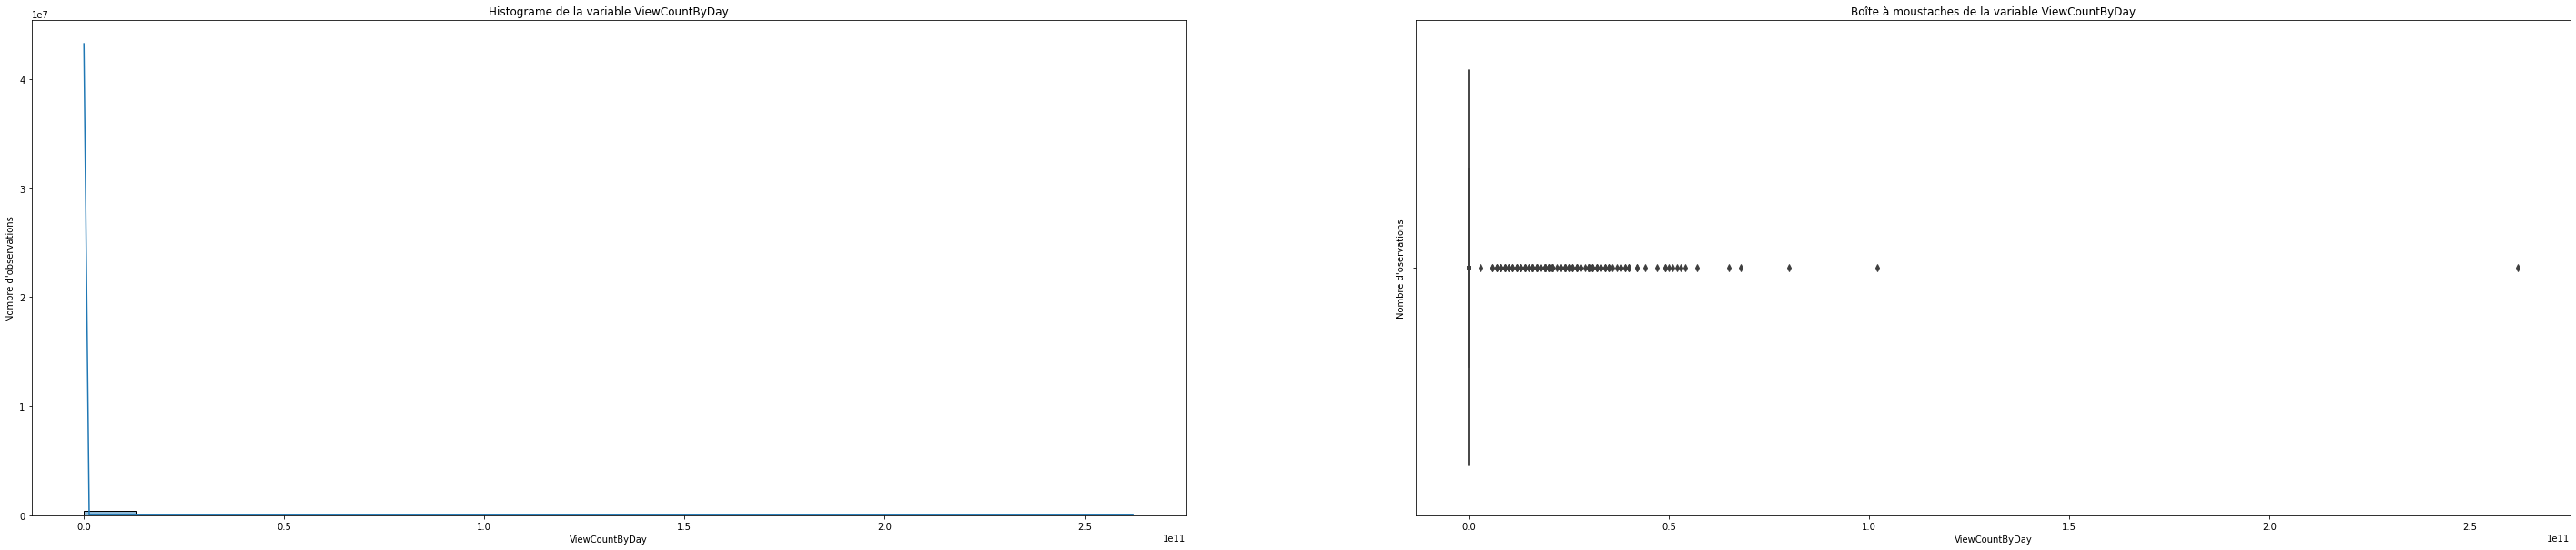


--------------------------------------------------

Indicateurs statistiques de distribution de la variable ViewCountByDay:


count    4.270180e+05
mean     1.012370e+07
std      6.894541e+08
min      9.744214e-03
25%      2.088353e-01
50%      5.735294e-01
75%      1.638298e+00
max      2.620000e+11
Name: ViewCountByDay, dtype: float64

In [62]:
data['ViewCountByDay'] =  data['ViewCount'] / (data['CreationDateTimeDelta']+0.000000001)
plot_continuous_distribution(data=data, col='ViewCountByDay')

### Corrélations entre les variables numériques

Afin d'évaluer les corrélations entre les variables, nous réalisons les matrices  Pearson et Spearman. 

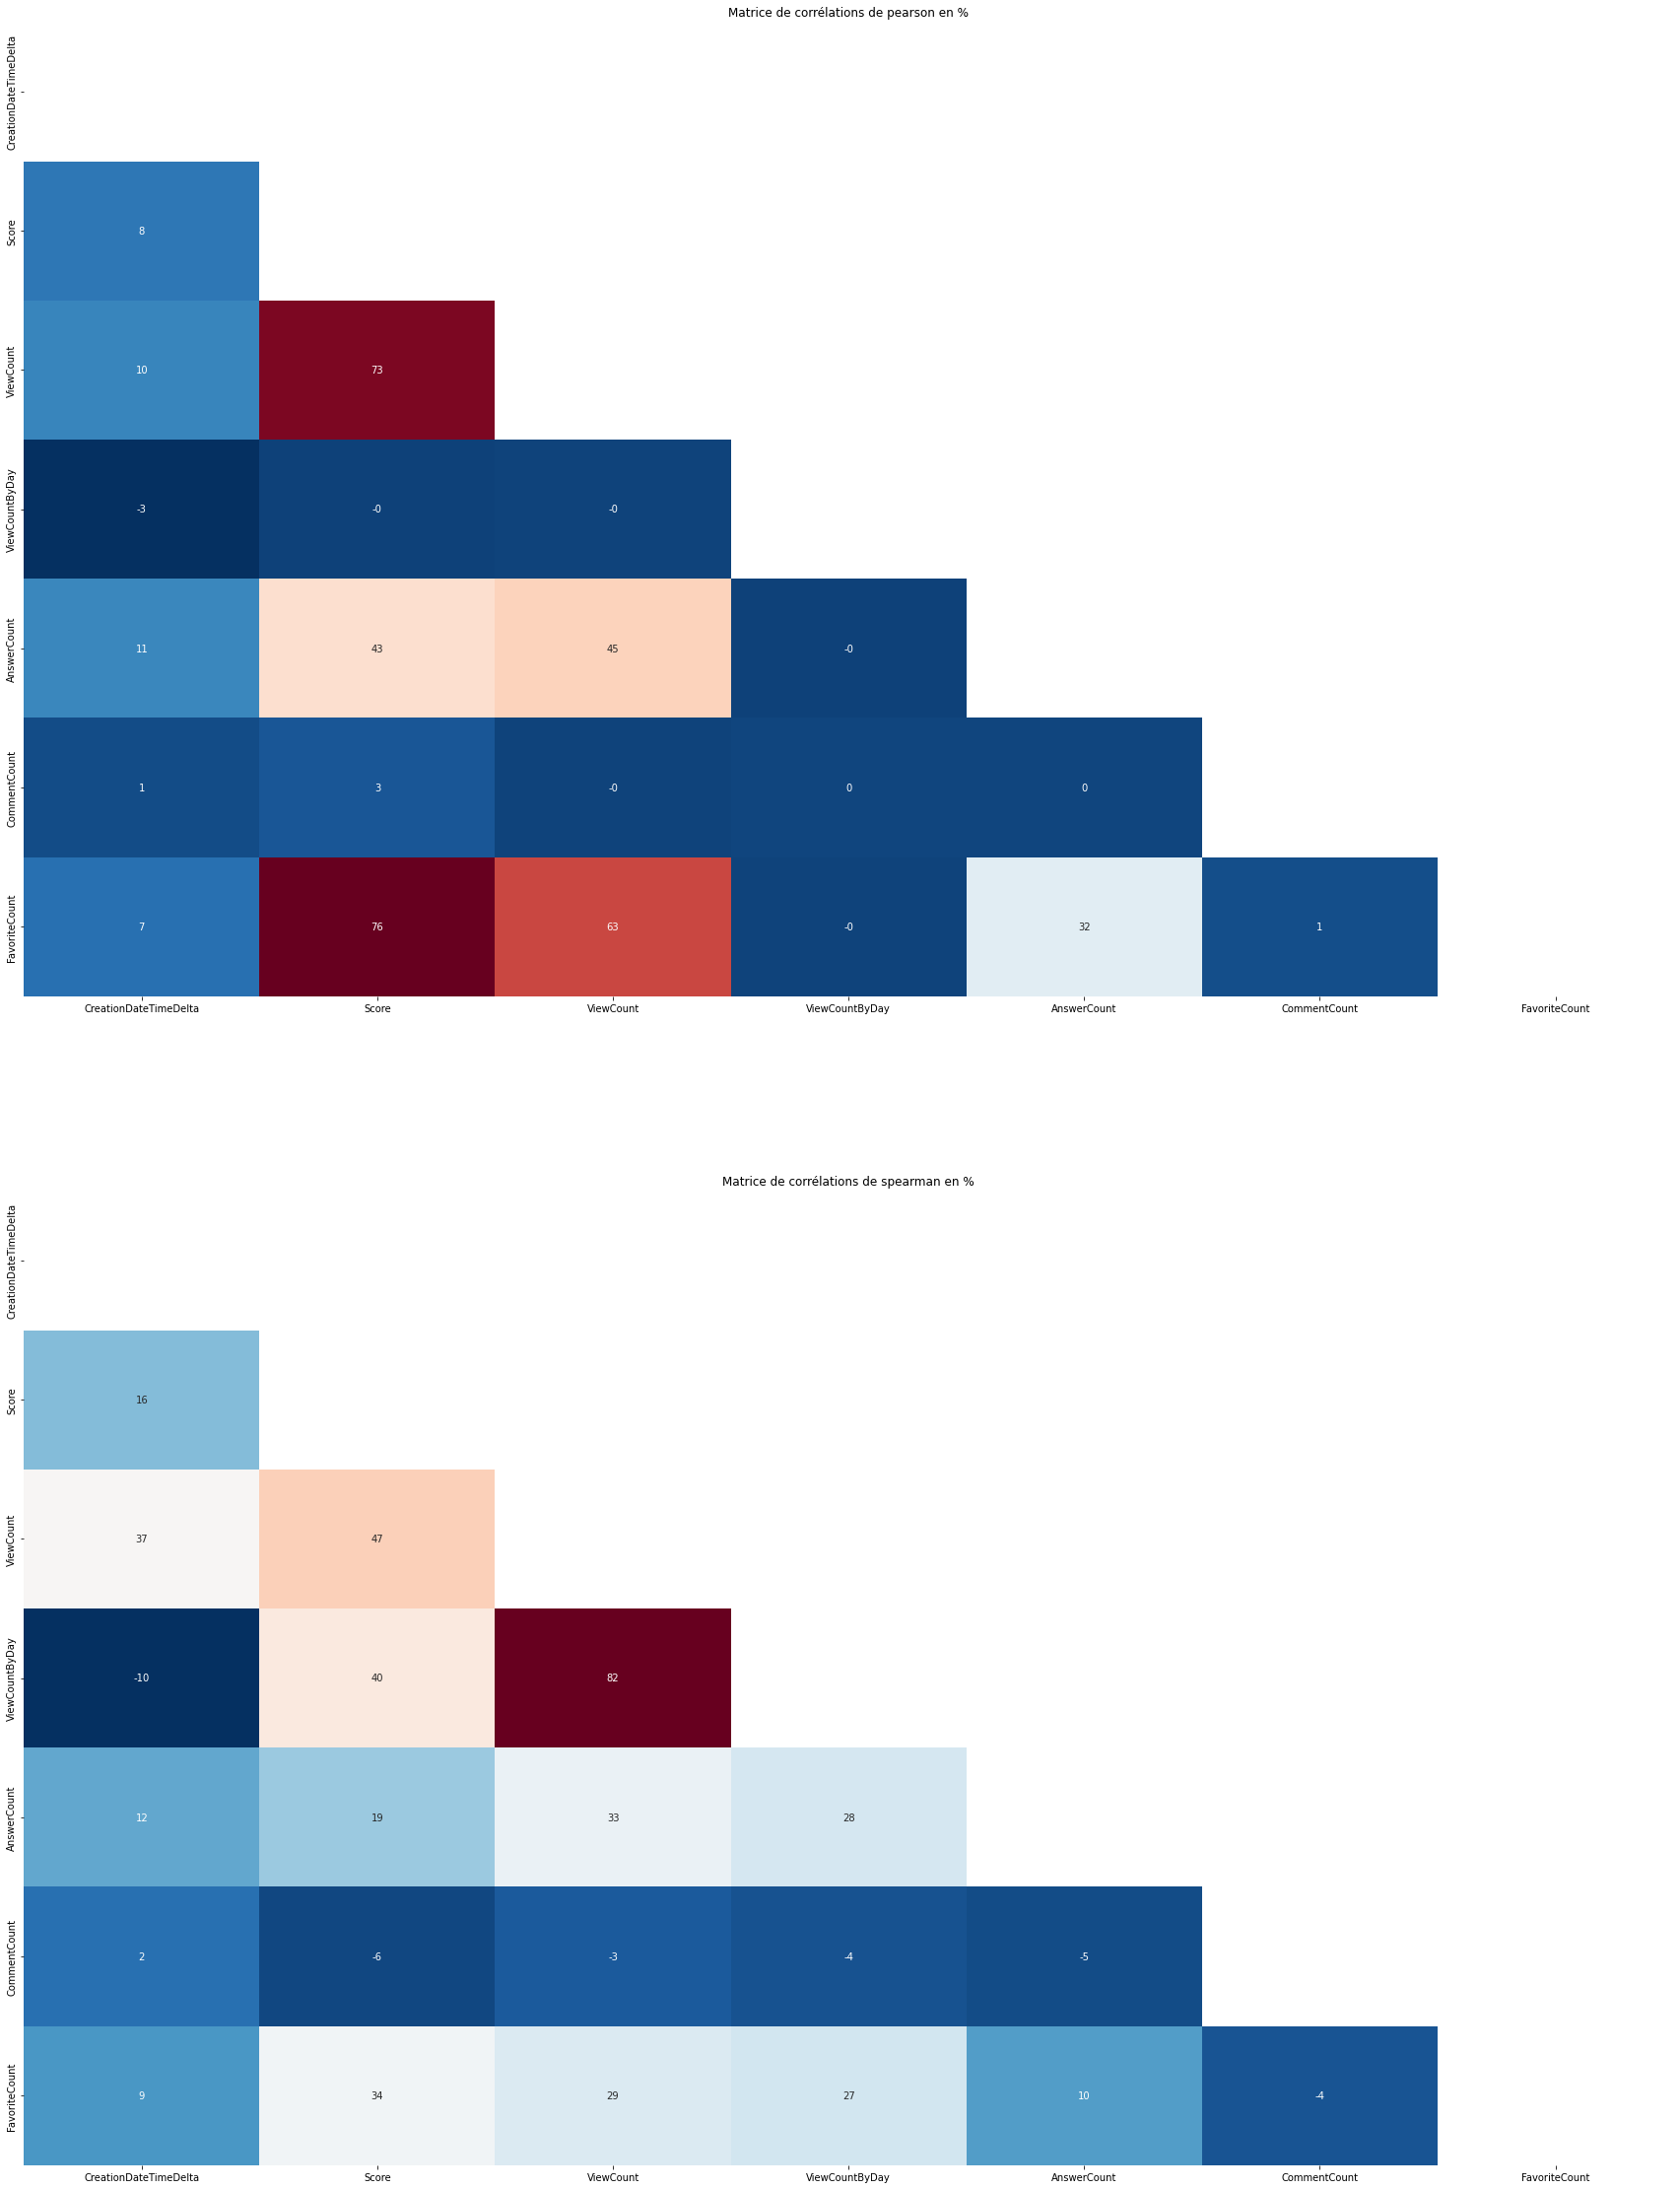

In [63]:
def correlations(data, methods):
    """
    Plot correlation matrix for quantitatives values.
    
    Args:
        data(dataframe): A dataframe
        
        method(string): CHosen method to compute correlation. Might be "pearson", "spearman" or "kendall"
        
    Returns:
        Correlation matrix
    """
    
    correlations = []
    cleanning_masks = []
    for method in methods: 
        correlation = data.select_dtypes(include=['int64','float64']).corr(method=method) * 100
        cleanning_mask = np.zeros_like(correlation)
        upper_triangle = np.triu_indices_from(correlation)
        cleanning_mask[upper_triangle] = 1
        correlations.append(correlation)
        cleanning_masks.append(cleanning_mask)

        
    fig, axes = plt.subplots(nrows=len(methods), figsize=(30,40))
    fig.subplots_adjust(wspace=0.2)

    for i in range(len(axes)):
        sns.heatmap(correlations[i], ax=axes[i], cmap="RdBu_r", mask = cleanning_masks[i], 
                   annot = True, fmt=".0f", cbar=False)

        axes[i].set_title(f"Matrice de corrélations de {methods[i]} en %")
  
    
correlations(data[["CreationDate","CreationDateTimeDelta","Score","ViewCount", "ViewCountByDay","AnswerCount","CommentCount","FavoriteCount"]], methods=["pearson", "spearman"])

Les visualisations permettent effectivement de constater des corrélations plus faibles avec la variable ViewCountByDay que VeiwCount . Nous décidons donc d’utiliser cette dernière. 

## Filtrage des données

Au vu de l'étude préalable nous décidons de placer un seuil à 0 pour les variables Socre, AnswerCount, CommentCount et FavoriteCount ainsi qu'un seuil à 5 pour ViewCountByDay.

In [64]:
filtered_data = data[(data['Score'] > 0) &
                           (data['AnswerCount']>0) &
                           (data['CommentCount']>0) &
                           (data['FavoriteCount']>0) &
                           (data['ViewCountByDay']>5)]
filtered_data.sort_values(['Score', 'ViewCount'], ascending=[False, False], inplace=True)
filtered_data_prop = round((filtered_data.shape[0] / data.shape[0] * 100),2)
display(filtered_data)
print(f"Porportion de données restantes: {filtered_data_prop}%")

filtered_data.to_csv('./data/filtered_data.csv')

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,CreationDateTimeDelta,ViewCountByDay
Id,,,,,,,,,,,
68775869,2021-08-13 16:49:34,1072,891829,42,16,383,Support for password authentication was remove...,<p>I got this error on my console when I tried...,<git><github><github-api><git-pull><personal-a...,295,3.023149e+03
62653114,2020-06-30 08:18:57,712,376122,12,5,136,"How can I deal with this Git warning? ""Pulling...",<p>After a <code>git pull origin master</code>...,<git>,704,5.342642e+02
63607158,2020-08-26 23:40:26,705,443241,50,12,211,"Xcode building for iOS Simulator, but linking ...",<p>I am trying to get a large (and working on ...,<ios><xcode><xcode12><xcode12beta5><xcode12beta6>,647,6.850711e+02
69692842,2021-10-23 23:39:57,474,419678,30,8,92,"Error message ""error:0308010C:digital envelope...",<p>I created the default IntelliJ IDEA React p...,<node.js><reactjs><webpack><webstorm>,224,1.873562e+03
63124161,2020-07-27 21:54:58,428,513782,32,2,91,Attempted import error: 'Switch' is not export...,<p>I don't know why I am getting this error an...,<reactjs>,677,7.589099e+02
...,...,...,...,...,...,...,...,...,...,...,...
72498499,2022-06-04 09:10:30,1,19,1,1,1,How to push existing Visual Studio project to ...,<p>I'm working on a Windows Form application i...,<github><visual-studio-2019>,0,1.900000e+10
72505032,2022-06-05 05:36:21,1,19,2,1,1,How to split a version number and assign each ...,<p>I want to be able to extract the individual...,<bash><shell>,0,1.900000e+10
72498665,2022-06-04 09:39:27,1,18,1,1,2,how to store date and timezone in Indian Stand...,<p>I have installed moment-timezone node-modul...,<node.js><mongodb><mongoose><moment-timezone>,0,1.800000e+10


Porportion de données restantes: 4.41%
